In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [60]:
df = pd.read_csv('https://raw.githubusercontent.com/bersonperson/sfdat28/master/data/App%20Weekly%20Review.csv')
df.head()

,ID,Featured,Pct_of_Active_(7d)_Teams_with_App_Installed,Active_(7d)_Installed_Teams,Pct_of_Installed_Teams_Using_App,App_Active_(7d)_Teams,App_Active_(7d)_Teams_Last_Week,Net_Growth,Pct_Growth,New,Pct_New,Resurrected,Retained,Pct_Retention,Churned,Pct_Churn,Stale
0,1,no,0.26,167239,0.30,49359,45135,4224,0.09,6839,0.15,14117,28403,0.63,16732,0.37,112999
1,2,no,0.23,151886,0.43,65718,61338,4380,0.07,4048,0.07,13135,48535,0.79,12803,0.21,77256
2,3,no,0.16,105937,0.56,59309,58475,834,0.01,1998,0.03,5098,52213,0.89,6262,0.11,34088
3,4,no,0.15,99137,0.15,14681,14445,236,0.02,447,0.03,2337,11897,0.82,2548,0.18,16424
4,5,no,0.15,95338,0.14,13384,12731,653,0.05,1757,0.14,4091,7536,0.59,5195,0.41,30987


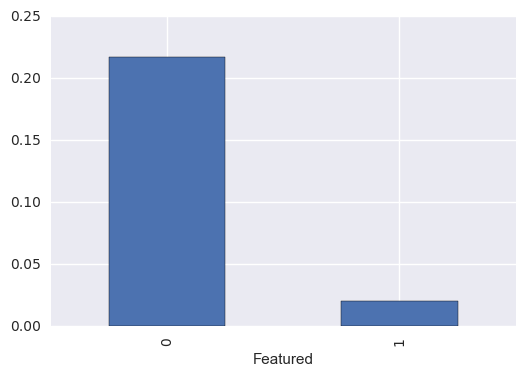

In [61]:
df['Featured'] = df.Featured.map({'no':0, 'yes':1})
df.groupby('Featured').Pct_Growth.mean().plot(kind='bar')

In [62]:
df.Featured.value_counts()

0    173
1     38
Name: Featured, dtype: int64

In [63]:
df.groupby('Featured').Pct_Growth.mean()

Featured
0    0.216994
1    0.020789
Name: Pct_Growth, dtype: float64

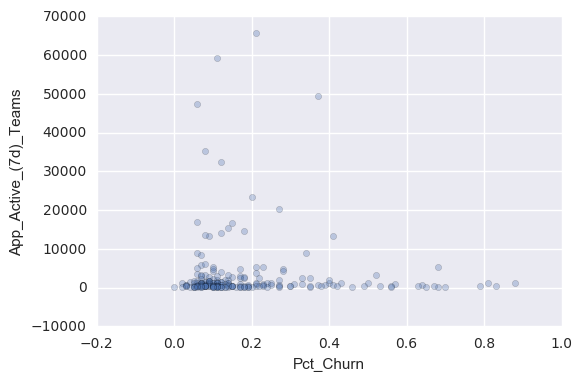

In [74]:
df.plot(x='Pct_Churn', y='App_Active_(7d)_Teams', kind='scatter', alpha=0.3)

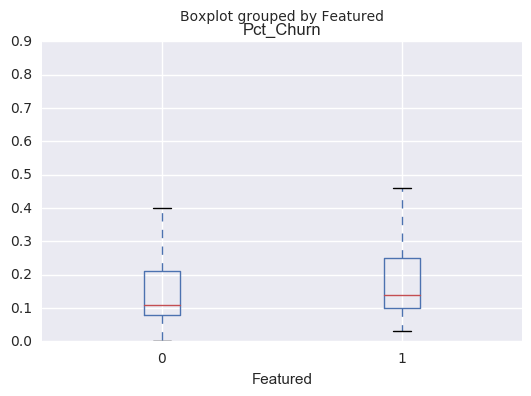

In [73]:
df.boxplot(column='Pct_Churn', by = 'Featured')

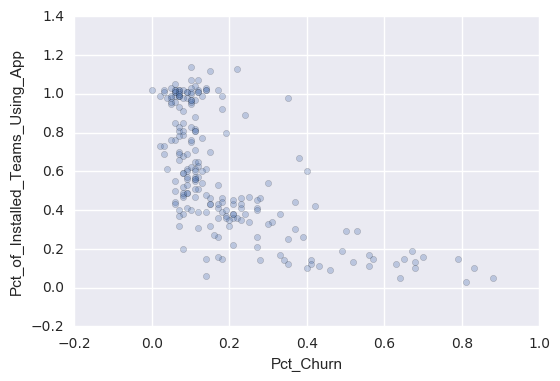

In [78]:
df.plot(x='Pct_Churn', y='Pct_of_Installed_Teams_Using_App', kind='scatter', alpha=0.3)

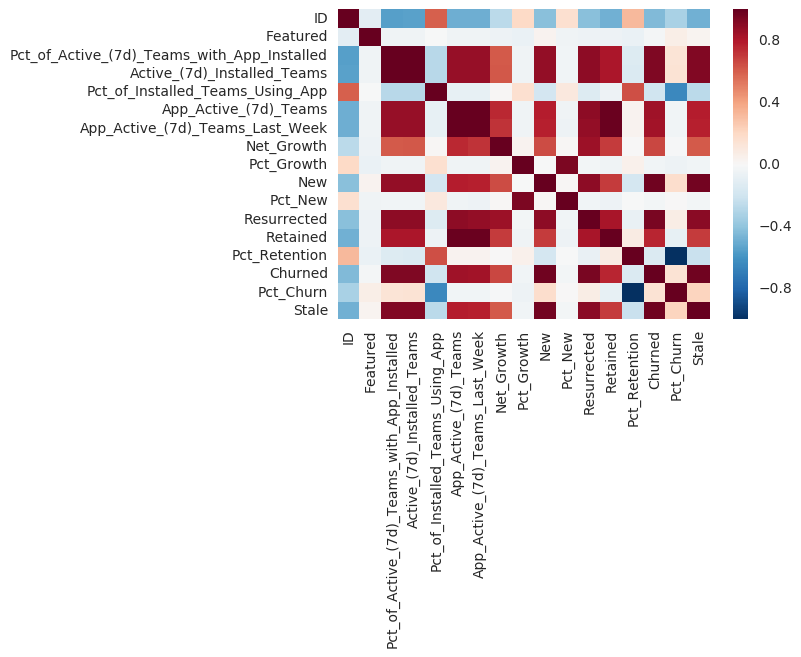

In [79]:
sns.heatmap(df.corr())

In [ ]:
actives = df['Active_(7d)_Installed_Teams']

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [84]:
df.columns

Index([u'ID', u'Featured', u'Pct_of_Active_(7d)_Teams_with_App_Installed',
       u'Active_(7d)_Installed_Teams', u'Pct_of_Installed_Teams_Using_App',
       u'App_Active_(7d)_Teams', u'App_Active_(7d)_Teams_Last_Week',
       u'Net_Growth', u'Pct_Growth', u'New', u'Pct_New', u'Resurrected',
       u'Retained', u'Pct_Retention', u'Churned', u'Pct_Churn', u'Stale'],
      dtype='object')

In [86]:
feature_cols = ['Net_Growth', 'Active_(7d)_Installed_Teams', 'Pct_Churn']
X = df[feature_cols]
y = df.Featured

In [87]:
logreg = LogisticRegression()
cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()

0.76567099567099561

In [100]:
knn = KNeighborsClassifier(5)
cross_val_score(knn, X, y, cv=25, scoring='accuracy').mean()

0.76079365079365091

In [105]:
from sklearn.grid_search import GridSearchCV
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 29)}
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

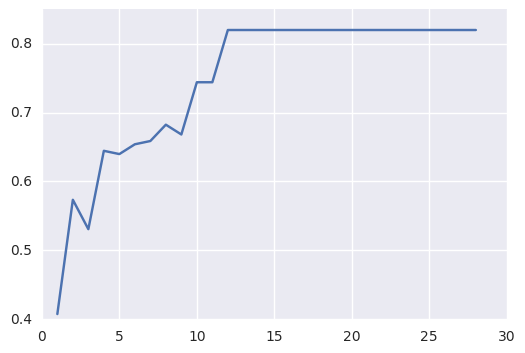

In [107]:
grid_mean_scores = [result[1] for result in grid.grid_scores_]
plt.figure()
plt.plot(range(1, 29), grid_mean_scores)

In [ ]:
# grid.best_estimator_

In [110]:
from sklearn import metrics
preds = grid.best_estimator_.predict(X)
print metrics.confusion_matrix(y, preds)

[[173   0]
 [ 38   0]]


In [113]:
null_accuracy_rate = df['Featured'].value_counts()[0] / float(df.shape[0])
null_accuracy_rate

0.81990521327014221

In [128]:
df[['Net_Growth', 'Active_(7d)_Installed_Teams', 'Pct_Churn','Featured']].corr()

,Net_Growth,Active_(7d)_Installed_Teams,Pct_Churn,Featured
Net_Growth,1.000000,0.623705,-0.007920,-0.052708
Active_(7d)_Installed_Teams,0.623705,1.000000,0.143220,-0.045415
Pct_Churn,-0.007920,0.143220,1.000000,0.065146
Featured,-0.052708,-0.045415,0.065146,1.000000


In [131]:
linreg = LinearRegression()
rmse = np.sqrt(abs(cross_val_score(linreg, X, y, cv = 5, scoring='mean_squared_error').mean()))
rmse

0.9635852922459972